# import library

In [146]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# road data

In [174]:
data = pd.read_csv('',header=None,delimiter=",")
x=data.T
data = x.values
X=data.tolist()
x

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,734,794,784,693,613,663,643,583,593,583,...,370,610,610,750,822,822,842,519,519,603
1,1196,1367,1467,1256,1216,1296,1528,1538,1256,1216,...,1050,1250,1250,1230,1484,1464,1664,1341,1302,1291
2,261,281,322,261,281,261,312,322,271,291,...,270,270,240,320,642,521,421,243,265,275
3,2241,2171,2362,2131,2271,2261,2312,2462,2201,2111,...,3000,2700,2850,3400,1444,2546,2707,2794,3164,2783
4,352,402,412,322,322,281,322,291,312,362,...,450,350,300,400,441,401,481,328,455,286
5,1397,1407,1668,1678,1457,1497,1367,1286,1518,1457,...,1300,1550,1500,1400,1223,1343,1604,2497,1513,1873
6,432,452,492,392,362,442,573,553,613,573,...,430,500,600,640,341,341,441,444,487,519
7,1980,2141,2121,2101,2071,2030,1799,1789,1598,1658,...,2600,2600,2300,2450,2687,2446,2548,2190,2138,2159
8,543,563,603,503,513,503,513,533,513,462,...,450,480,610,500,762,702,842,519,466,381
9,1005,1106,1186,1055,1015,935,925,955,935,834,...,830,1000,1100,900,1404,1464,1664,2974,921,974


In [170]:
#平均値、標準偏差を求める
def mean_std(s):

    f1=[[],[]]
    f2=[[],[]]
    #2列ごとに（あ～お）に分けて、平均値、標準偏差を求める
    data=[list(pair) for pair in zip(s[0::2],s[1::2])]
    for len in data:
            f1[0].append(np.mean(len[0]))
            f1[1].append(np.std(len[0]))
            f2[0].append(np.mean(len[1]))
            f2[1].append(np.std(len[1]))

    return f1,f2,data

#マハラノビスの距離の式
def mahara(mean1,std1,mean2,std2,x1,x2,w):
    dis = np.sqrt(((x1-mean1)/std1)**2*w+((x2-mean2)/std2)**2)-0.001
    return dis

#マハラノビスの距離を求める
def distance(s,w):

    f1,f2,data=mean_std(s)
    result=[]
    for i in range(len(data)):
        __=[]
        for l in range(len(data)):
            _=[]
            x1,x2=data[i]
            for k,m in zip(x1,x2):
                mean1=f1[0][l]
                std1=f1[1][l]
                mean2=f2[0][l]
                std2=f2[1][l]
                _.append(mahara(mean1,std1,mean2,std2,k,m,w))
            __.append(_)
        result.append(__)
    return result

#マハラノビスの距離を求めた結果を表示
def show_distance(s,w):
    re=distance(s,w)
    for _ in re:
        _=pd.DataFrame(_)
        result=_.T
        result.columns=["あ(距離)","い(距離)","う(距離)","え(距離)","お(距離)"]
        display(result)

#マハラノビスの距離が最小になる母音を見つける
def show_judge(s,w):
    re=distance(s,w)
    result_tr=[]
    for _ in re:
        _=pd.DataFrame(_)
        result=_.T

        #最小値から-0.001をする
        for i in range(len(result)):
            min_val=result.iloc[i,:].min()
            result.iloc[i,:]-=min_val+0.001

        #符号が-になったものを数える
        count = result.apply(lambda x: (x < 0).sum())
        c=pd.DataFrame(count)
        c=c.T
        c.columns=["あ(判定数)","い(判定数)","う(判定数)","え(判定数)","お(判定数)"]

        result.columns=["あ(判定)","い(判定)","う(判定)","え(判定)","お(判定)"]
        display(result)
        display(c)

        result_tr.append(result)
        return result_tr
          
#正解率を求める
def accuracy(s,w,P):
    re=distance(s,w)
    count_all=[]
    for _ in re:
        _=pd.DataFrame(_)
        result=_.T

        for i in range(len(result)):
            min_val=result.iloc[i,:].min()
            result.iloc[i,:]-=min_val+0.001

        count = result.apply(lambda x: (x < 0).sum())
        count_all.append(list(count))
    correct=0
    for i in range(5):
        correct+=count_all[i][i]

    all_sums = sum([sum(col) for col in zip(*count_all)])
    accuracy=correct/(all_sums)
    if P:
        print("accuracy:",accuracy)
    return accuracy,correct,all_sums

#重みを変化させ、正解率を求める
def grad(s,n,P):
    w=0
    acc_max=0
    w_=[]
    acc_=[]
    corr_=[]
    for i in np.arange(0,n,0.01):
        acc,corr,sums=accuracy(s,i,P)
        acc_.append(acc)
        w_.append(i)
        corr_.append(corr)
        if acc_max<acc:
            acc_max=acc
            w_max=i
        #elif (acc_max-acc)>0.02:
        #    break

    print("w:",w_max)
    print("accuracy;",acc_max)
    return w_,acc_,corr_,sums,w_max

#正解率の変化をプロットする
def plot_acc(x,y):
    import matplotlib.pyplot as plt
    w,acc=x,y

    plt.plot(w,acc)
    plt.xlabel("weight")
    plt.ylabel("accuracy")
    plt.grid(True)

    plt.show()

# 男女104人の音声データの識別

w: 1.25
accuracy; 0.8153846153846154


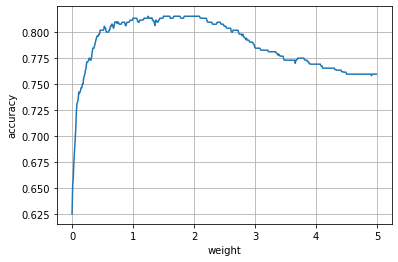

In [173]:
w,acc,_,__,___=grad(X,5,False)
plot_acc(w,acc)

# 男女で分けた場合の音声データの識別

w: 0.72
accuracy; 0.8297297297297297
w: 0.65
accuracy; 0.8133333333333334


Text(0.5, 0, 'weight')

Text(0, 0.5, 'correct')

Text(0.5, 1.0, 'split of sex')

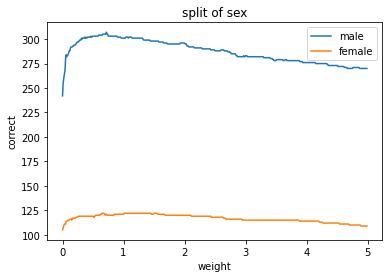

w_male : 0.72
female : 0.65
0.8234165067178503


In [182]:
X_=x.copy()
w_all=[]
corr_all=[]
acc_=[]
w1_=[]
w2_=[]
kind=["a","a","i","i","u","u","e","e","o","o"]

male=X_.iloc[:,:74]
female=X_.iloc[:,74:]
male=male.values.tolist()
female=female.values.tolist()

w1,acc1,corr1,sums1,w1_max=grad(male,5,False)
w2,acc2,corr2,sums2,w2_max=grad(female,5,False)

title = "split of sex"
plt.plot(w1, corr1, label='male')
plt.plot(w2, corr2, label='female')
plt.xlabel('weight')
plt.ylabel('correct')
plt.title(title)
plt.legend()

plt.show()

print(f"w_male : {w1_max}")
print(f"female : {w2_max}")
print((max(corr1) + max(corr2)) / (sums1 + sums2))

# 男女が未知の場合の音声データの識別

w: 0.4
accuracy; 0.7769230769230769
w: 2.42
accuracy; 0.8653846153846154


Text(0.5, 0, 'weight')

(149.4, 260.0)

Text(0, 0.5, 'correct')

Text(0.5, 1.0, 'a: f0')

w: 0.89
accuracy; 0.8346153846153846
w: 1.6
accuracy; 0.8115384615384615


Text(0.5, 0, 'weight')

(141.4, 260.0)

Text(0, 0.5, 'correct')

Text(0.5, 1.0, 'a: f1')

w: 1.61
accuracy; 0.8461538461538461
w: 0.99
accuracy; 0.8076923076923077


Text(0.5, 0, 'weight')

(155.95, 260.0)

Text(0, 0.5, 'correct')

Text(0.5, 1.0, 'i: f0')

w: 2.3000000000000003
accuracy; 0.8038461538461539
w: 0.34
accuracy; 0.8461538461538461


Text(0.5, 0, 'weight')

(154.9, 260.0)

Text(0, 0.5, 'correct')

Text(0.5, 1.0, 'i: f1')

w: 0.7000000000000001
accuracy; 0.8269230769230769
w: 0.84
accuracy; 0.8076923076923077


Text(0.5, 0, 'weight')

(153.05, 260.0)

Text(0, 0.5, 'correct')

Text(0.5, 1.0, 'u: f0')

w: 1.84
accuracy; 0.7923076923076923
w: 0.68
accuracy; 0.8307692307692308


Text(0.5, 0, 'weight')

(158.25, 260.0)

Text(0, 0.5, 'correct')

Text(0.5, 1.0, 'u: f1')

w: 2.39
accuracy; 0.8192307692307692
w: 1.28
accuracy; 0.8538461538461538


Text(0.5, 0, 'weight')

(151.65, 260.0)

Text(0, 0.5, 'correct')

Text(0.5, 1.0, 'e: f0')

w: 0.62
accuracy; 0.823076923076923
w: 1.54
accuracy; 0.8115384615384615


Text(0.5, 0, 'weight')

(155.2, 260.0)

Text(0, 0.5, 'correct')

Text(0.5, 1.0, 'e: f1')

w: 0.76
accuracy; 0.8269230769230769
w: 0.76
accuracy; 0.8538461538461538


Text(0.5, 0, 'weight')

(149.55, 260.0)

Text(0, 0.5, 'correct')

Text(0.5, 1.0, 'o: f0')

w: 0.72
accuracy; 0.8384615384615385
w: 0.81
accuracy; 0.8153846153846154


Text(0.5, 0, 'weight')

(149.75, 260.0)

Text(0, 0.5, 'correct')

Text(0.5, 1.0, 'o: f1')

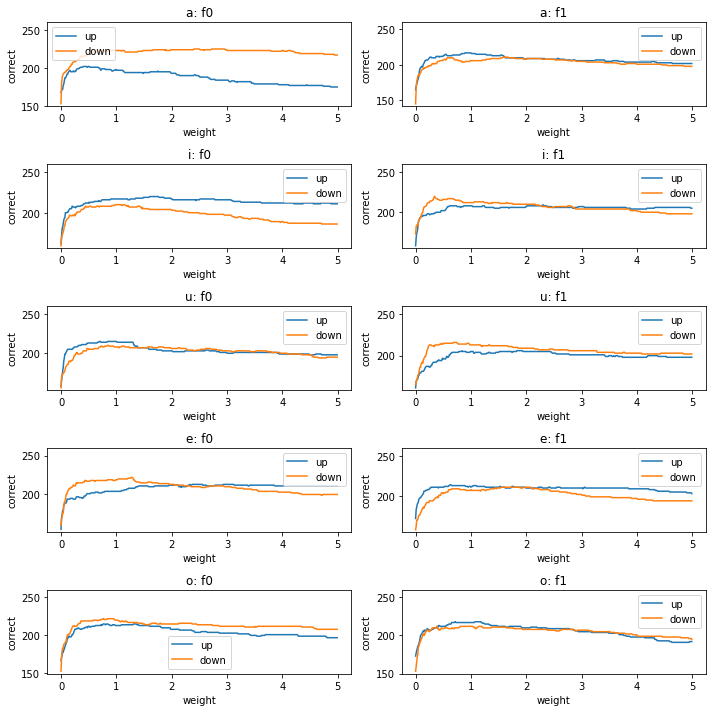

a f0
max_accuracy : 0.8211538461538461
weight_up : 0.4
weight_down : 2.42
-----------------------
a f1
max_accuracy : 0.823076923076923
weight_up : 0.89
weight_down : 1.6
-----------------------
i f0
max_accuracy : 0.8269230769230769
weight_up : 1.61
weight_down : 0.99
-----------------------
i f1
max_accuracy : 0.825
weight_up : 2.3000000000000003
weight_down : 0.34
-----------------------
u f0
max_accuracy : 0.8173076923076923
weight_up : 0.7000000000000001
weight_down : 0.84
-----------------------
u f1
max_accuracy : 0.8099808061420346
weight_up : 1.84
weight_down : 0.68
-----------------------
e f0
max_accuracy : 0.8365384615384616
weight_up : 2.39
weight_down : 1.28
-----------------------
e f1
max_accuracy : 0.8157389635316699
weight_up : 0.62
weight_down : 1.54
-----------------------
o f0
max_accuracy : 0.8403846153846154
weight_up : 0.76
weight_down : 0.76
-----------------------
o f1
max_accuracy : 0.8269230769230769
weight_up : 0.72
weight_down : 0.81
----------------------

In [155]:
import matplotlib.pyplot as plt

X_=x.copy()
w_all=[]
corr_all=[]
acc_=[]
w1_=[]
w2_=[]
kind=["a","a","i","i","u","u","e","e","o","o"]
fig, axes = plt.subplots(5, 2, figsize=(10, 10))

for i in range(10):
    X_=X_.sort_values(by=i,axis=1)
    half=len(X_.columns)//2
    X1=X_.iloc[:,:half]
    X2=X_.iloc[:,half:]
    X1=X1.values.tolist()
    X2=X2.values.tolist()

    w1,acc1,corr1,sums1,w1_max=grad(X1,5,False)
    w2,acc2,corr2,sums2,w2_max=grad(X2,5,False)

    title = f"{kind[i]}: f{i%2}"
    axes[int(i/2)][i%2].plot(w1, corr1, label='up')
    axes[int(i/2)][i%2].plot(w2, corr2, label='down')
    axes[int(i/2)][i%2].set_xlabel('weight')
    axes[int(i/2)][i%2].set_ylim(top=260)
    axes[int(i/2)][i%2].set_ylabel('correct')
    axes[int(i/2)][i%2].set_title(title)
    axes[int(i/2)][i%2].legend()

    w1_.append(w1_max)
    w2_.append(w2_max)
    acc_.append((max(corr1) + max(corr2)) / (sums1 + sums2))

plt.tight_layout()
plt.show()

for i in range(len(acc_)):
    print(f"{kind[i]} f{i%2}")
    print(f"max_accuracy : {acc_[i]}")
    print(f"weight_up : {w1_[i]}")
    print(f"weight_down : {w2_[i]}")
    print("-----------------------")